In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("ecommerce")

In [5]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


All recorded time values are in minutes  
All monetory values are in US dollars

In [6]:
# Gathering all relative information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
# Making sure there no null values in the database

df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

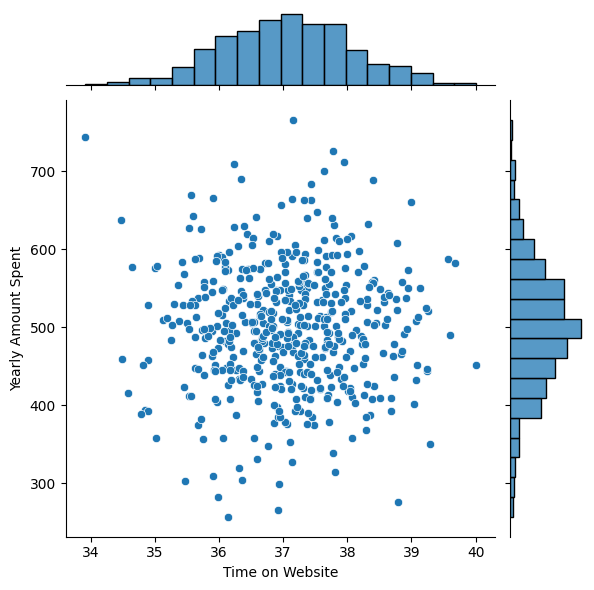

In [19]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df)

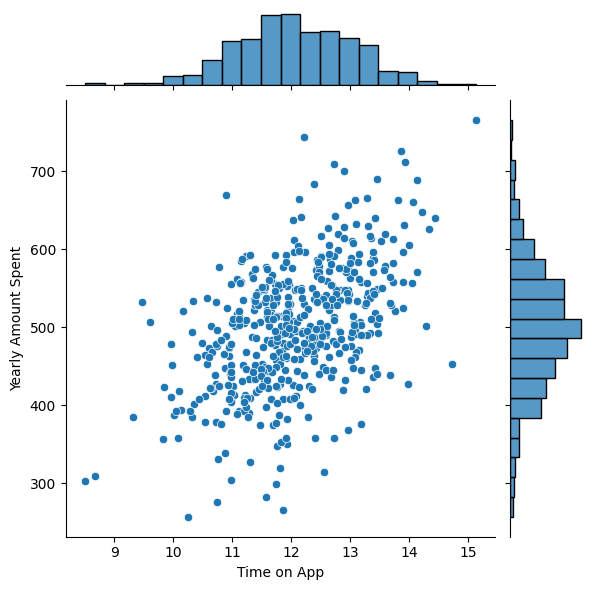

In [21]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=df)

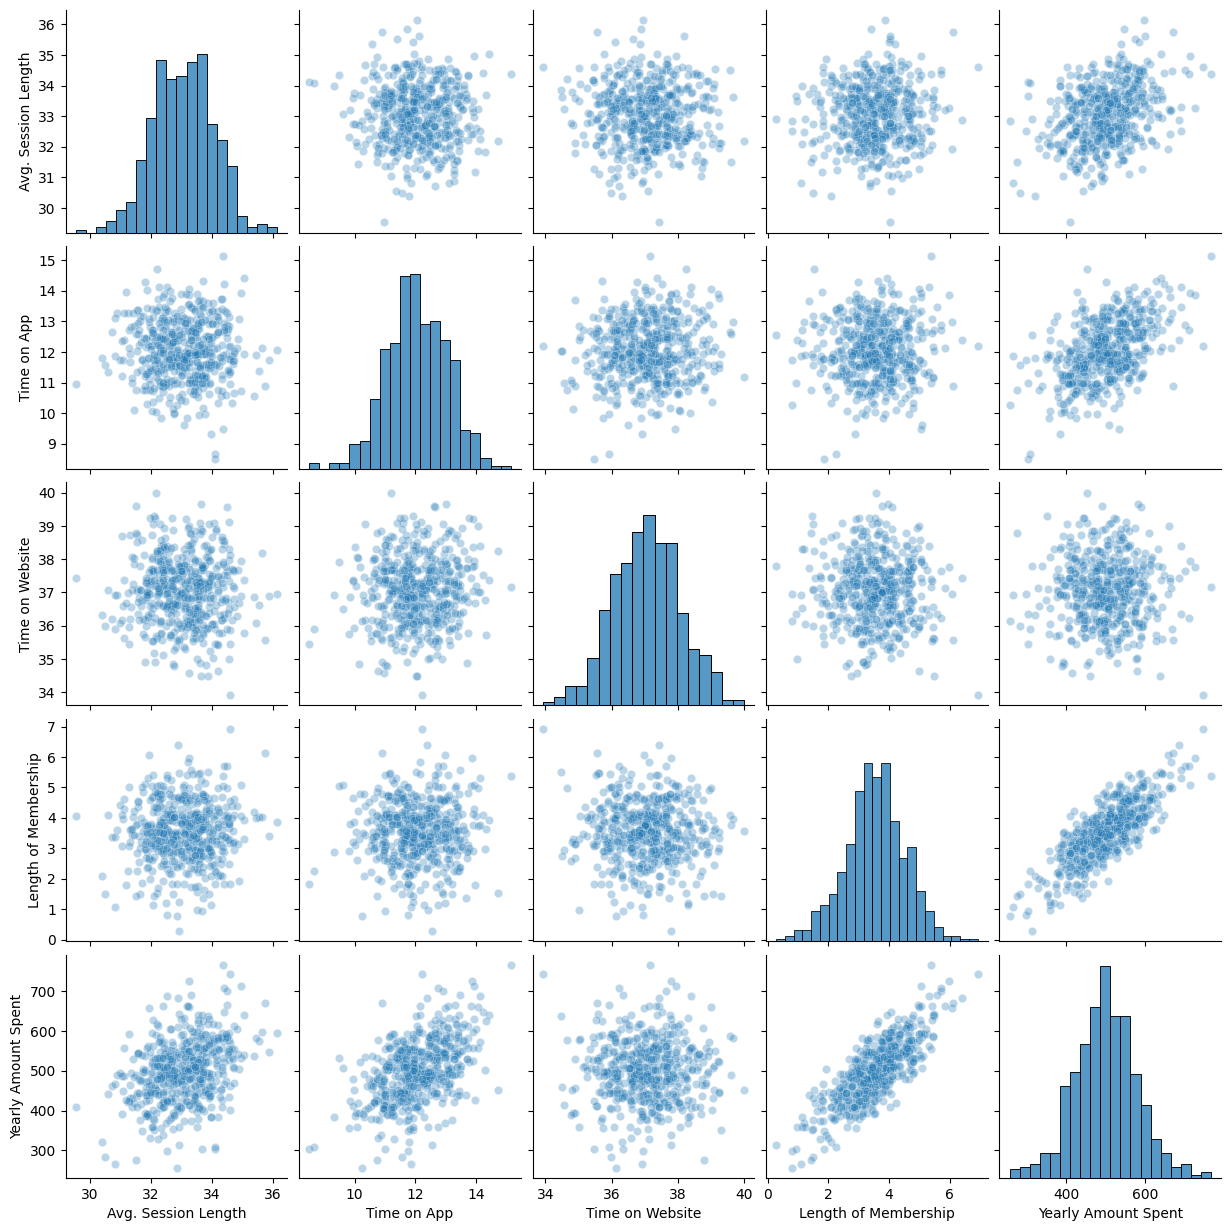

In [27]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha': 0.3})

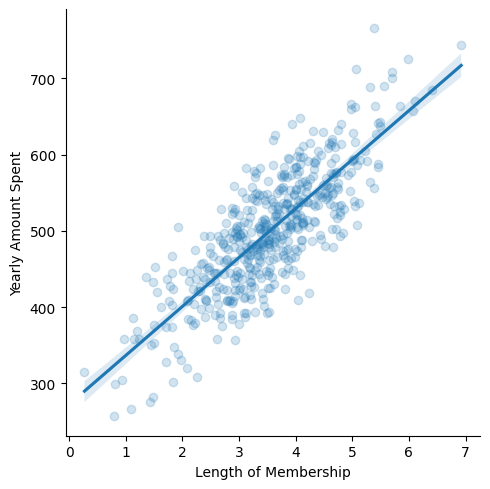

In [33]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df, scatter_kws={'alpha': 0.2})

In [16]:
# Dropping nonnumeric value-columns

numeric_df=df.drop(df.columns[:3], axis=1)
numeric_df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


<Axes: >

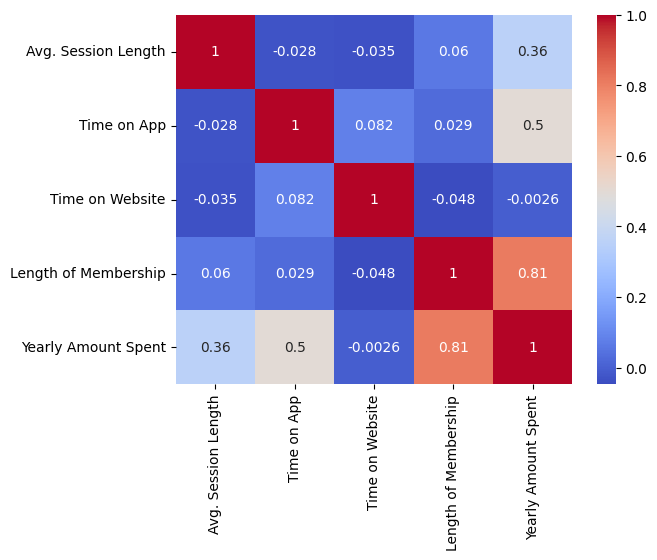

In [17]:
# Producing a correlation matrix
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [60]:
X = numeric_df[['Time on App', 'Time on Website', 'Avg. Session Length', 'Length of Membership']] # Features
y = numeric_df['Yearly Amount Spent'] # Target

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [62]:
X_train.count()

Time on App             375
Time on Website         375
Avg. Session Length     375
Length of Membership    375
dtype: int64

In [63]:
y_train.count()

375

In [64]:
X_test.count()

Time on App             125
Time on Website         125
Avg. Session Length     125
Length of Membership    125
dtype: int64

In [65]:
y_test.count()

125

## Training Model

In [66]:
lm = LinearRegression()

In [67]:
lm.fit(X_train, y_train)

LinearRegression()

In [68]:
lm.coef_

array([38.68815596,  0.45279908, 25.69083176, 61.71050259])

In [69]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['coef'])
print(cdf)

                           coef
Time on App           38.688156
Time on Website        0.452799
Avg. Session Length   25.690832
Length of Membership  61.710503


## Predictions

In [72]:
pred = lm.predict(X_test)

In [73]:
pred

array([403.36087526, 542.49652255, 426.79061944, 501.98000522,
       409.90016607, 569.95203575, 531.68712688, 506.10842617,
       408.47031037, 473.71493101, 441.30201774, 425.05268133,
       424.93655583, 527.27340348, 431.24084639, 423.76635768,
       575.73837263, 484.73375076, 458.15131382, 481.73089746,
       502.04156769, 513.39008852, 507.55579577, 646.54871994,
       449.98886069, 496.07689142, 556.2403381 , 554.77842999,
       399.41536028, 325.54121912, 532.65563818, 477.96272707,
       500.87585571, 305.69578623, 505.5581936 , 483.59198597,
       518.72294437, 437.96539568, 456.5172541 , 470.84325957,
       494.20975196, 445.1840947 , 508.62394573, 500.91793768,
       488.73418105, 535.19202701, 595.04122136, 513.81284729,
       280.44329112, 433.04560196, 421.42401729, 481.13163584,
       584.63530063, 608.71467973, 564.01947373, 494.49273084,
       394.32484472, 456.44102533, 572.84643521, 499.46263062,
       512.73482583, 391.89419968, 479.80345348, 481.34

Text(0.5, 1.0, 'LM model Eval')

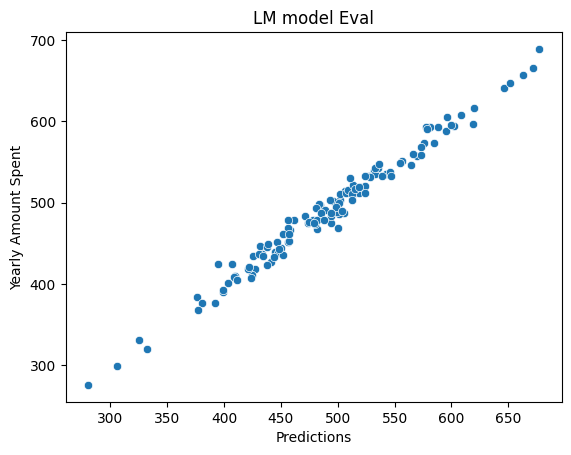

In [79]:
sns.scatterplot(x=pred, y=y_test)
plt.xlabel("Predictions")
plt.title("LM model Eval")

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [84]:
print("Mean Absolute Error:", mean_absolute_error(y_test, pred))
print("Mean Squared Error:", mean_squared_error(y_test, pred))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 8.460454170141155
Mean Squared Error: 105.64514296279505
Root Mean Squared Error: 10.278382312542915


## Residuals

In [85]:
residuals = y_test - pred

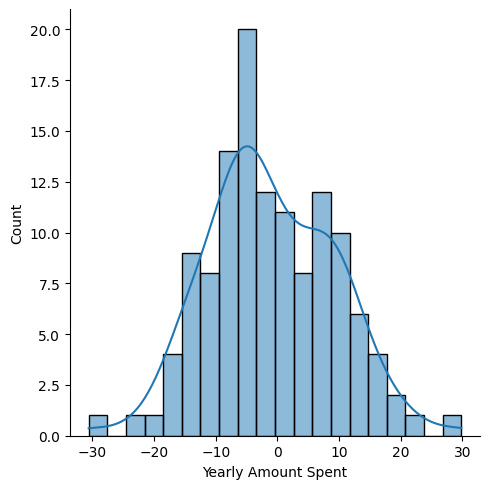

In [98]:
sns.displot(residuals, bins=20, kde=True)

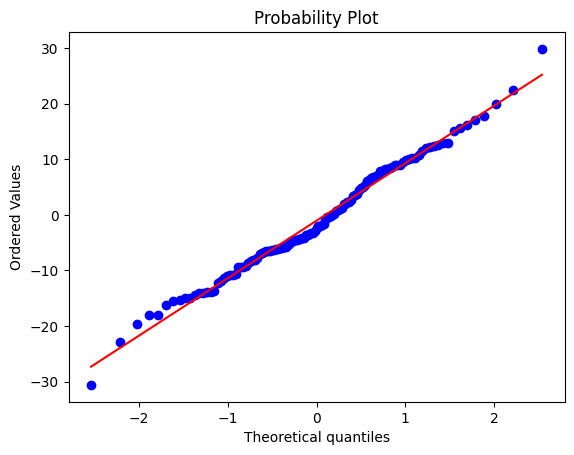

In [99]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist='norm', plot=pylab)
plt.show()